<a href="https://colab.research.google.com/github/yuguerten/text-mining-project/blob/master/arabic_text_classification_LSTM_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'my-datastet:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4950602%2F8335875%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240508%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240508T091305Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Da26962a53181fbfe86904cfd989f88ab1e6c05aac6b03d461914124027e7bae869a4db5e691ce0ee84a3fc6120adcd67a852ac4787735dc13568ac1d2bcb5f53a4c9fcc75eca05ddf53dd7783fe42ed73e22690ec547a4fe8af0165c82cba7b0166cacfdad95a245754c9c4c478926b4a689fbf3703f0486ccfd0767a7f58afb94270774784d57f68be25c5760c362bf9e630404775d3bdf4044a48768b05dde4f063490af9ff26e27f27eaa6c5b5ce881f8ac15677b8bcfb63279349bb627d3946c6ad2f51b9b28acc550cbba8b6160555f0f334f4fdc17323a5ce4982575ae2f2c370f5adfe02d9d0792c1300f2ba85e15537b12b084e9bbf2afdb6503ce77'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 9875647 bytes downloaded
Downloaded and uncompressed: my-datastet
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/my-datastet/train_data.csv


# Creating the Dataset from txt files

In [3]:
import pandas as pd
import os

In [4]:
# def read_txt_file(file_path):
#     with open(file_path, 'r', encoding='utf-8') as file:
#         content = file.read()
#     return content

In [5]:
#base_dir = '/kaggle/input/bbc-arabic-utf8/bbc-arabic-utf8'
#dfs = []

In [6]:
#print(os.listdir(base_dir))

In [7]:
# for category in os.listdir(base_dir):
#     category_dir = os.path.join(base_dir, category)
#     if os.path.isdir(category_dir):
#         Loop through .txt files in the category directory
#         for txt_file in os.listdir(category_dir):
#             if txt_file.endswith('.txt'):
#                 txt_file_path = os.path.join(category_dir, txt_file)
#                 Read the content of the .txt file
#                body = read_txt_file(txt_file_path)
#                 Create a DataFrame for the current .txt file
#                df = pd.DataFrame({'Body': [body], 'category': [category]})
#                 Append the DataFrame to the list
#                 dfs.append(df)

In [8]:
#df = pd.concat(dfs, ignore_index=True)

In [9]:
#df['Body'][5]

In [10]:
# df.info()

In [11]:
# df.isnull().sum()

In [12]:
# save the df into dataset.csv
# df.to_csv('dataset.csv', index=False)

# Installing and Importing Libraries

In [13]:
!pip install nltk

In [14]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
!pip install Arabic-Stopwords

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.5/360.5 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 8.5 MB/s eta 0:00:00


In [16]:
!pip install PyArabic

In [17]:
!pip install Tashaphyne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.5/251.5 kB 5.5 MB/s eta 0:00:00


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import regex
import nltk
from nltk.corpus import stopwords # Stopwords
import arabicstopwords.arabicstopwords as stp #more of arabic stop words
from nltk.stem.isri import ISRIStemmer
import pyarabic.araby as araby
from tashaphyne.stemming import ArabicLightStemmer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.layers import GlobalMaxPooling1D
from keras.layers import Conv1D
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Explotary Data Analysis

In [19]:
df = pd.read_csv('/kaggle/input/my-datastet/train_data.csv',encoding='utf-8')
df.sample(10)

,category,Body
158,Business,. - الامارات: المجلس الوطني يقر قانونا لضمان ا...
9121,Entertainment,عرضت مقتنيات غريبة للبيع من مواقع المزادات الش...
6140,World,"- العالم - اطلاق سراح رهينتين في دارفور =""امرا..."
3971,World,. - روسيا تقود تكتلا عسكريا جديدا لدول سوفيتيه...
11090,Sport,- رياضه - فيضانات شمالي انجلترا الرءيسيه الشرق...
7709,Science and Technology,- علوم وتكنولوجيا - صور ملونه لاعماق الفضاء ال...
3024,Sport,. - الزمالك يستعيد طعم الفوز والاسماعيلي يفلت ...
10948,Sport,. - الهلال يتصدر ابطال افريقيا.. والحدود يتعثر...
2205,Science and Technology,". - ""ابل"" تطلق هاتف الاسرع من سابقيه ( +:) -..."
4097,World,. - كوريا الشماليه تهدد باعتبار عقوبات محتمله ...


In [20]:
df.shape

(11204, 2)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11204 entries, 0 to 11203
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  11204 non-null  object
 1   Body      11204 non-null  object
dtypes: object(2)
memory usage: 175.2+ KB


In [22]:
df.isnull().sum()

category    0
Body        0
dtype: int64

In [23]:
df.duplicated().sum()

1805

In [24]:
df[df['Body'].duplicated() == True]

,category,Body
424,Business,. - الاسوا مازال في انتظار اقتصاد الولايات الم...
2410,Science and Technology,. - اسءله واجوبه حول فيروس انفلونزا الخنازير ...
4260,Middle East News,- الشرق الاوسط - بالصور: تفجيرات العراق الرءيس...
4261,Middle East News,- الشرق الاوسط - بالصور: تفجيرات العراق الرءيس...
4262,Middle East News,- الشرق الاوسط - بالصور: تفجيرات العراق الرءيس...
...,...,...
11199,Sport,- رياضه - دوري ابطال اوروبا: بايرن ميونيخ يصعق...
11200,Sport,- رياضه - دوري ابطال اوروبا : تعادل برشلونه وا...
11201,Sport,- رياضه - دوري ابطال اوروبا : تعادل برشلونه وا...
11202,Sport,- رياضه - دوري ابطال اوروبا: انتر ميلان يفوز ب...


In [25]:
index = df[df['Body'].duplicated() == True].index
df.drop(index, axis = 0, inplace = True)

In [26]:
df.shape

(9386, 2)

In [27]:
arabic_stopwords = stopwords.words("arabic")
len(arabic_stopwords)

754

In [28]:
df['stop_words'] = df['Body'].apply(lambda x: len(set(x.split()) & set(arabic_stopwords)))
df.stop_words.value_counts()

stop_words
21     441
19     440
20     433
22     430
17     405
      ... 
65       1
79       1
100      1
99       1
63       1
Name: count, Length: 72, dtype: int64

In [29]:
 df['category'].value_counts()

category
Middle East News          2410
World                     2203
Business                  1735
Science and Technology    1360
Sport                      912
Entertainment              766
Name: count, dtype: int64

<Axes: ylabel='count'>

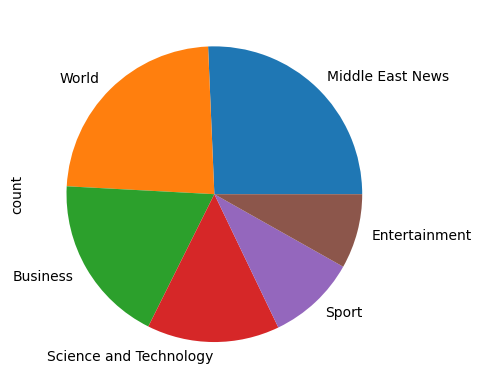

In [30]:
 df['category'].value_counts().plot(kind='pie')

In [31]:
middle_east_rows = df[df['category'] == 'Middle East News'].index
middle_east_rows

Index([1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019,
       ...
       5776, 5778, 5779, 5780, 5781, 5782, 5783, 5784, 5786, 5787],
      dtype='int64', length=2410)

In [32]:
world_rows = df[df['category'] == 'World'].index
world_rows

Index([3211, 3212, 3213, 3214, 3215, 3216, 3217, 3218, 3219, 3220,
       ...
       7150, 7152, 7154, 7156, 7158, 7160, 7161, 7162, 7164, 7166],
      dtype='int64', length=2203)

In [33]:
rows_to_drop = np.random.choice(middle_east_rows, size=400, replace=False)
df = df.drop(rows_to_drop)

In [34]:
rows_to_drop = np.random.choice(world_rows, size=200, replace=False)
df = df.drop(rows_to_drop)

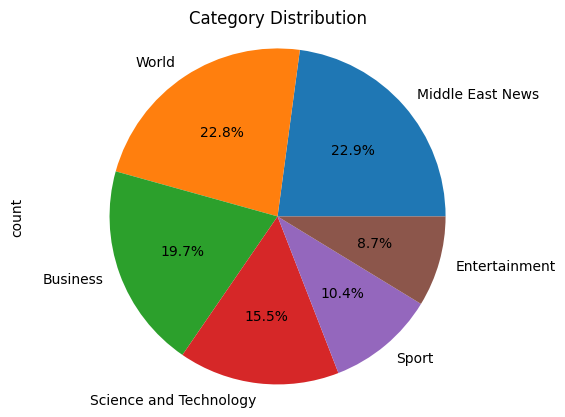

In [35]:
# Get value counts
category_counts = df['category'].value_counts()

# Plot pie chart with percentages and title
category_counts.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.title('Category Distribution')
plt.show()

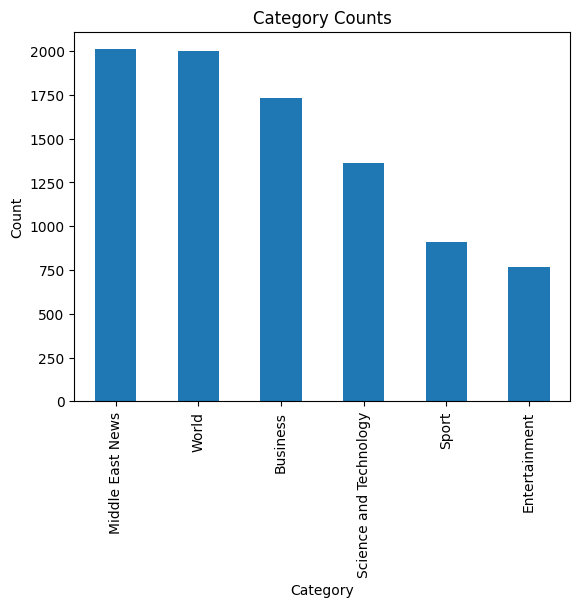

In [36]:
# Plot bar chart with title
category_counts.plot(kind='bar')
plt.title('Category Counts')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# Data Cleaning and Preprocessing

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8786 entries, 0 to 10221
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   category    8786 non-null   object
 1   Body        8786 non-null   object
 2   stop_words  8786 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 274.6+ KB


In [38]:
df['Body'] = df['Body'].astype('string')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8786 entries, 0 to 10221
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   category    8786 non-null   object
 1   Body        8786 non-null   string
 2   stop_words  8786 non-null   int64 
dtypes: int64(1), object(1), string(1)
memory usage: 274.6+ KB


In [40]:
df['Body'][88]

'. - "احد اخضر" ينعش ذاكره الصعود في البورصات العربيه  ( +:) - // "احد اخضر" ينعش ذاكره الصعود في البورصات العربيه اللون الاخضر عم شاشات تداول الاسواق العربيه دبي، الامارات العربيه المتحده( ) -- انعكست نتاءج الانباء الايجابيه التي تلقتها اسواق المال الدوليه مطلع الاسبوع علي اداء البورصات العربيه، التي شهدت، الاحد، يوما "اخضر" اعاد لذاكرتها ايام الانتعاش. وكانت الاسواق الدوليه انتعشت مستجيبه لقرارات قمه العشرين، التي عقدت في لندن الاسبوع الماضي، والتي تضمنت دعم الاقتصاد العالمي، وانعاش اسواق المال، وتنشيط التجاره، في خطه تزيد قيمتها علي تريليون دولار. ففي اكبر بورصه عربيه، واصل المءشر السعودي ارتفاعه لليوم الثاني علي التوالي مسجلا . في الماءه، تضاف الي ارتفاعه القياسي السبت، ليستقر عند مستوي خمسه الاف نقطه، بعد ان كان تراجع دونه خلال التعاملات. ويوم السبت، حقق المءشر صعودا بنحو . في الماءه، هو الاعلي له في يوم واحد منذ سته اسابيع، وسط تحسن معنويات المتعاملين الذين استجابوا لانتعاش الاسواق الدوليه. وسجلت السوق السعوديه، الاحد، تعاملات بنحو . مليارات ريال، وهي ضعف القيمه التي اعتادت عليها

In [41]:
def Arabic_Light_Stemmer(text):
    #making an object
    Arabic_Stemmer = ArabicLightStemmer()

    #stemming each word
    text=[Arabic_Stemmer.light_stem(y) for y in text.split()]

    return " " .join(text)

def normalizeArabic(text):
    text = text.strip()
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)

    #remove repetetions
    text = re.sub("[إأٱآا]", "ا", text)
    text = text.replace('وو', 'و')
    text = text.replace('يي', 'ي')
    text = text.replace('ييي', 'ي')
    text = text.replace('اا', 'ا')

    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)

    # Remove longation
    text = re.sub(r'(.)\1+', r"\1\1", text)

    #Strip vowels from a text, include Shadda.
    text = araby.strip_tashkeel(text)

    #Strip diacritics from a text, include harakats and small lettres The striped marks are
    text = araby.strip_diacritics(text)
    text=''.join([i for i in text if not i.isdigit()])
    return text

def Removing_non_arabic(text):
    text = re.sub('[A-Za-z]+',' ',text)
    return text

def Removing_numbers(text):
    text=''.join([i for i in text if not i.isdigit()])
    return text

def Removing_punctuations(text):
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)
    text = text.replace('؛',"", )

    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    text =  " ".join(text.split())
    return text.strip()

def remove_extra_Space(text):
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    return  " ".join(text.split())

def remove_hashtages_and_mentions(text):
    text = re.sub("@[A-Za-z0-9_]+","", text)
    text = re.sub("#[A-Za-z0-9_]+","", text)
    return text

def replace_random_text(text):
    text = text.replace('\u202c', '')
    text = text.replace('\u202e', '')
    text = text.replace('\u202d', '')
    return text

def remove_stopwords_robustly(text):
    # Split the text into words
    words = text.split()

    # Remove stop words
    filtered_words = [word for word in words if word not in stp.stopwords_list()]

    # Join the filtered words back into a string
    filtered_text = ' '.join(filtered_words)

    return filtered_text

def remove_stop_words(text):
    Text=[i for i in str(text).split() if i not in arabic_stopwords]
    return " ".join(Text)

In [42]:
df['Body'] = df['Body'].apply(remove_stop_words)

In [43]:
df['Body'] = df['Body'].apply(Arabic_Light_Stemmer)

In [44]:
df['Body'] = df['Body'].apply(normalizeArabic)

In [45]:
df['Body'] = df['Body'].apply(Removing_non_arabic)

In [46]:
df['Body'] = df['Body'].apply(Removing_numbers)

In [47]:
df['Body'] = df['Body'].apply(Removing_punctuations)

In [48]:
df['Body'][88]

'احد اخضر نعش ذاكر صعود بورص عربيه احد اخضر نعش ذاكر صعود بورص عربيه لون اخضر عم شاش داول اسواق عربيه دبي امار عربيه متحده انعكس تاءج انباء ايجابيه تلق سواق مال دوليه مطلع اسبوع علي داء بورص عربيه شهدت احد وم اخضر عاد ذاكر يام انتعاش انت اسواق دوليه انتعش مستجيب قرار قم عشرين عقد دن اسبوع ماضي التي تضمن دعم اقتصاد عالمي نعاش سواق مال نشيط تجاره خط زيد قيم علي ريلي دولار في كبر ورص عربيه صل مءشر سعود رتفاع يوم ثان علي توال مسجل ماءه ضاف لي رتفاع قياس سبت ستقر مستو خمس اف نقطه ان راجع دو خلال التعاملات وم سبت حقق مءشر صعود نحو ماءه اعل وم ست اسابيع سط حس معنو متعامل ستجاب انتعاش اسواق دوليه سجل سوق سعوديه احد تعامل نحو مليار ريال هي ضعف قيمه اعتاد علي سوق اشهر ماضيه التي تحقق داول كثر ملي سهم خلال لف صفق نقديه بعد قفز بيره نه مءشر سوق كويت اوراق ماليه وم علي رتفاع نحو نقطه عادل ماءه قيمته كبر رتفاع وم اشهر ستقر مستو نقطه روابط علاق اسهم سعوديه ستهل تداول اسبوع ارتفاع قياس قم قر خط نعاش اقتصاد عالم ترليون تفاءل شان قم عشر دفع نفط ارتفاع قفز قيم تعامل علي اسهم كويتيه صل ملي دينار تحقق داول

In [49]:
df['Body'] = df['Body'].apply(remove_hashtages_and_mentions)

In [50]:
df['Body'] = df['Body'].apply(replace_random_text)

In [51]:
df.sample(10)

,category,Body,stop_words
3084,Sport,الفيفا رفض طلب ايرلند المخدوعه اعاد مبارا رنس ...,23
7556,Sport,رياض منتخب نهاء اس عالم اكتمال عقد منتخب مشارك...,19
340,Business,جنرال موتورز شك قدر علي استمرار جنرال موتورز ش...,14
3821,World,حرير مراسل نيويور تايمز مختطف افغانس حرير مراس...,19
7873,Science and Technology,علوم وتكنولوجيا هاتف محمول جديد سمح مدراء تجسس...,34
2300,Science and Technology,ذا ارد ابقاء علي شباب دماغ علي رياضه ذا ارد اب...,25
6799,World,عالم هايتي نقاذ مرا عمر يام انقاض فرق انقاذ ها...,31
2035,Science and Technology,ركان تشايتن عاود فور مجدد جنوب شيل ركان تشايتن...,21
5376,Middle East News,شرق اوسط رزا يامر تعليق عطله البرلمانيه شتويه ...,9
4865,Middle East News,شرق اوسط امنتس طالب غاء حكم عدام علي معارض ير ...,28


In [52]:
my_data = df.copy()

In [53]:
my_data

,category,Body,stop_words
0,Business,تكهن مرعبه ركود كلف ريطانيا ملي ظيف تكهن مرعبه...,20
1,Business,بنك دولي طفره اسعار سلع نته باطء نمو عالم بنك ...,35
2,Business,عقار امريك فقد ريلي قيم عام عقار امريك فقد ريل...,18
3,Business,كرايسلر وقف نتاج سيار مصنع مد شهر كرايسلر وقف ...,32
4,Business,امريكا تفاق حول نقاذ قطاع السيارات خلاف حول دا...,26
...,...,...,...
10213,Business,قضاء صين حكم سجن ربع مسءول شرك معادن استراليه ...,3
10215,Business,نجح يون حصول علي قروض قيم مليار سوق ماليه عالم...,6
10217,Business,واصل سعار نفط حقيق رتفاع ربع وي جديد عام استمر...,9
10219,Business,اظهر ارقام صادر يوم مكتب احصاء وطن بريطان ان ا...,9


In [54]:
my_data['Body'][0]

'تكهن مرعبه ركود كلف ريطانيا ملي ظيف تكهن مرعبه ركود كلف ريطانيا ملي ظيف تكهن ارتفاع معدل باحث عمل دبي دول امار عربيه متحده رسم قرير حديث تاثير قاتم غايه ركود اقتصاد علي سوق عمل بريطانيا متوقع لاش لف ظيف خلال عام مقبل كه معهد توظيف تنميه قرير شر اثنين ارتفاع شتوي معدل سريح موظف خلال ربع اول عام رق لي قد لف ريطان لوظاءفهم بلغ رقام بطاله ريطانيا حالي معدل قياسيه ملي عاطل اعل ول حزب عمال سلطه عام توقع ان رتفع مليون خر عام مقبل فق فاينانشيال تايمز توقع ان بلغ خساءر سوق عمل البريطاني ذرو ربيع عام متوقع رتفاع معدل بطاله لي ملا معدل با قم ركود ضرب بلاد مطلع ثمانين والتسعينيات رجح معهد تقرير مقياس سنوي ان صل صاف خساءر سوق وظاءف عام مقبل ف لف ظيف خلال عام حالي اضافه لي لف خر عام صف يلبوت بير اقتصاد معهد سوق عمل بريطان خلال عام حالي باسترجاع حداث ماض هذا سوي مقدمه حركه بطيءه عد سو عام سوق عمل خلال عقد ماضين روابط علاق جول راون دع دول خليج مساهمه حل ازمه ماليه بريطانيا كثر دول وروب تاثر ركود مقبل قاد وروب تفق علي خط نقاذ قيم مليار ضاف محذرا الفتر عام جديد عيد فصح كو اسو قد وظاءف عام فق صحيفه دي ر

In [55]:
my_data['Body'][1]

'بنك دولي طفره اسعار سلع نته باطء نمو عالم بنك دولي طفره اسعار سلع نته باطء نمو عالم ناول تقرير تاثير ازمه ماليه عصف اقتصاد عالم دبي دول امار عربيه متحده تناول قرير جديد صادر بنك دول عنوان الافاق الاقتصاديه عالميه بحث تاثير ازمه ماليه حاليه علي مو جمال ناتج محل مختلف انحاء عالم شار تقرير شر ثلاثاء لي حدوث باطء ملحوظ نشاط اقتصاد انحاء معموره بلد ناميه اتسم اقتصاد سابق مرونه قدره علي تكيف خلص تقرير لي ان امكان حقيق توازن جانب طلب عرض نسبه سلع اوليه اساسيه نفط مواد غذاءيه مستقبل ذا توافر سياس سليمه قطاع طاقه زراعه فق موقع الكترون هيءه دوليه ركود عالم ضرب بلد ناميه وقع تقرير ان تقلص معدل مو جمال ناتج محل عالم ماءه عام لي ماءه عام ان نخفض معدل نمو بلد ناميه سب ماءه عام اتسم مرونه لي ماءه عام كو معدل نمو بلد غنيه عام مقبل علي ارجح سلبيا في معرض حديث تقرير قال هانز تيمر مدير فريق معن اتجاه عالميه مجموع فاق تنميه تابعه بنك دولي نر ان اقتصاد عالم مر وقت راهن مرحل نتقال ره طويل نمو قو ـ قاد بلد ناميه ـ لي حال غه عدم يق غموض جراء اثار شديده حقته ازمه ماليه حاليه اسواق العالميه اضاف ان تباطء شهد ب

In [56]:
my_data['Body'][2002]

'ناسا يبلر بد مهم بحث اشقاء ارض نجاح ناسا يبلر بد مهم بحث اشقاء ارض نجاح علماء فضاء ستمر بحث احياء علي واكب خر دبي امار عربيه متحده اعلن ال بحاث فضاء طير امريكيه ناسا ان تليسكوب كيبلر دا عل تزويد محطه معلوم جديده مهمه رسل لاتمامها التي دات عشر ايام كد علماء ناس ان يبلر تم طلاق سادس مارس ذار ماضي عمل شكل جيد ان قدر علي رصد تغير سيط ضوء منبعث نجوم كواكب دل علماء علي ان جما مع مل غلاف جويا كد رءيس ريق علماء عامل مهم يبلر ليام وروكي ان قدر تليسكوب علي قياس ضوء جمع معلوم خاصه عنه مك علماء كتشاف واكب جديد حجم ارض تضم مهم تليسكوب متد ثلاث وات نصف حصول علي معلوم حول اف نجوم مجر طريق لبانه نتمي يه وكب ارض وصول لي واكب حجم كره ارضيه مد نتشار فضاء روابط علاق مك فضاء امريك انديفور عود لي ارض نجاح ناسا طلق كيبلر مهم بحث اشقاء ارض ناس قطع جارب هابل صوير جويف غامض علي مشتر ستخدم علماء ناس وكبا رصد تليسكوب قل طور يبلر دعي قرب لي شمس بـ مره ساوي حجم حجم وكب مشتري وكب خارج نظام شمسي ستطاع يبلر رصد غلاف جو هذا كوكب عطي صور قدر تليسكوب كبيره فق سار سيغر عض ريق بحث مهم يبلر ان تليسكوب استطاع قل معلوم كوكب 

In [57]:
my_data['Body'] = my_data['Body'].apply(remove_stopwords_robustly)

In [58]:
my_data['Body'][20]

'بورص عربيه با اداء تشاءم خيم امار بورص عربيه با اداء تشاءم خيم امار سوق دب مال سجل راجع اثن دبي امار عربيه متحده با داء سواق مال عربيه اثنين عدما حقق اسهم كبر ورص عرب رتفاع جيدا سط قبال شراء متعامل رهق انتظار ترقب عدما راقب سهم نحدر شده قت صعد سهم سعوديه كويت مصر اردن تراجع ورصتا امار سط تقارير باطء مو اقتصاد امارات زم ءتما مقبله اد شر جواء تشاءم اسواق ماليه فق سماسره سعوديه سب مءشر ماءه قيم اثنين نهي جلس تداول مستو نقطه رابح جديده قريب قيمه راجع احد سجل سوق قيم تداول لغت مليار سعود متراجع ربع تداول احد تحقق داول ملي سهم ارتفع هايت سعار سهم شركه سجل سهم شرك خساءر متفاوته محافظ مصرف مركز امارات سلط سويد قال صحف مءتمر اثن ان باطء مو اقتصاد راجع مو قطاع عقار محتمل سط زم غاء وظاءف قطاع شهد طفر اكثر سنوات كويت صعد اسهم اثنين عمل شراء اسعه دي رتفاع مءشر سوق نقطه قيم مءشر ستقر مستو نقاط حقق سوق تداول قيم ملي سجل داول كثر ملي سهم ارتفع مءشر قطاع خدم مءشر قطاع صناعه مءشر قطاع استثمار راجع مءشر قطاع بنوك نقطه امار عربيه راجع مءشر ورص دب ماءه مستو نقطه بع مءشر ابوظب اصغر ماءه مستو نقطه يوم ثالن 

In [59]:
my_data.head()

,category,Body,stop_words
0,Business,تكهن مرعبه ركود كلف ريطانيا ملي ظيف تكهن مرعبه...,20
1,Business,بنك دولي طفره اسعار سلع نته باطء نمو عالم بنك ...,35
2,Business,عقار امريك ريلي قيم عام عقار امريك ريلي قيم عا...,18
3,Business,كرايسلر وقف نتاج سيار مصنع مد كرايسلر وقف نتاج...,32
4,Business,امريكا تفاق نقاذ قطاع السيارات خلاف داء خزانه ...,26


In [60]:
my_data.duplicated().sum()

2

In [61]:
index = my_data[my_data['Body'].duplicated() == True].index
my_data.drop(index, axis = 0, inplace = True)

#resetting the index of the data
my_data.reset_index(drop=True, inplace = True)

In [62]:
my_data.duplicated().sum()

0

In [63]:
my_data.to_csv('newsfeed.csv', index=False)

In [65]:
my_df = pd.read_csv('/content/newsfeed.csv', encoding='utf-8')
my_df.sample(10)

,category,Body,stop_words
154,Business,رتفاع خليج يستثن سهم قطر سط عود مضاربه رتفاع خ...,22
810,Entertainment,زوج جاكس تنازل حق حضا ولاد اتفاق سري زوج جاكس ...,34
1221,Middle East News,مبار محذر اسراءيل جيش مصر قادر رد صاع صاع مبار...,20
4028,Middle East News,اوسط معارضه سودانيه عتبر حكومه شرعيه تواصل جدل...,27
2959,Sport,مانشستر تقدم عرض شراء يتو رشلون مانشستر تقدم ع...,28
5720,World,عالم اوبام تعهد انجاز مهمه افغانس الرءيس امريك...,27
2615,Sport,يونايتد نجو هزيم ثقيله ملعب مام ساندرلاند ثلاث...,15
3365,World,تقرير يرا رد مقترح خصيب اليورانيوم خميس ثلاثاء...,17
8155,Business,اعلن شرك عربيه طير الاماراتيه اربعاء نه ءسس شر...,5
7973,Entertainment,عيد مصر تابو خشب ثر عمر ثلاث اف سن سرق مصر كثر...,6


In [66]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   category    8784 non-null   object
 1   Body        8784 non-null   object
 2   stop_words  8784 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 206.0+ KB


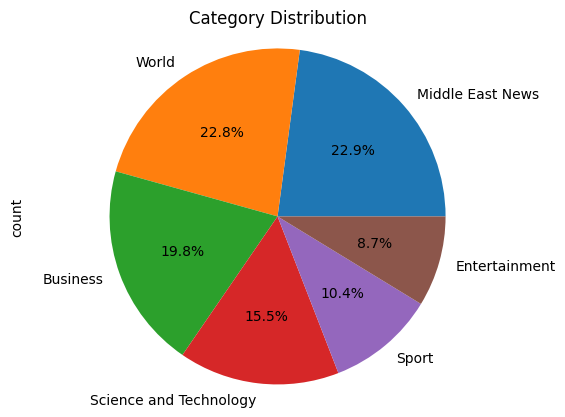

In [67]:
# Get value counts
category_counts = my_df['category'].value_counts()

# Plot pie chart with percentages and title
category_counts.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.title('Category Distribution')
plt.show()

## Generate the Embeddings

In [68]:
df = my_df[['Body','category']]

In [69]:
corpus = []
for i in range(0, len(df)):
    review = df['Body'][i]
    corpus.append(review)

In [70]:
len(corpus)

8784

In [71]:
# Vocabulary size
voc_size=1000

In [72]:
onehot_repr=[one_hot(words,voc_size)for words in corpus]

In [73]:
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=None) # this will ensure that all the senetences have the same list shape
print(embedded_docs)

[[  0   0   0 ... 976 544 913]
 [  0   0   0 ... 811 511 437]
 [  0   0   0 ... 476 282 297]
 ...
 [  0   0   0 ... 930 765 765]
 [  0   0   0 ... 141 505 732]
 [  0   0   0 ...  70 790 319]]


In [74]:
sequence_lengths = [len(seq) for seq in onehot_repr]

# Find the maximum sequence length
maxlen = np.max(sequence_lengths)
print("Maximum sequence length:", maxlen) # we will use this as an input_length of our Embedding Layer

Maximum sequence length: 3793


In [75]:
print(f"the shape of the embedded docs is :  {len(embedded_docs)}")

the shape of the embedded docs is :  8784


In [76]:
df['category'].shape

(8784,)

## Data Splitting

In [77]:
df['category'].unique()

array(['Business', 'Entertainment', 'Middle East News',
       'Science and Technology', 'Sport', 'World'], dtype=object)

In [78]:
# Initialize OneHotEncoder
one_hot_encoder = OneHotEncoder()

# Fit and transform the 'category' column
encoded_categories = one_hot_encoder.fit_transform(df['category'].values.reshape(-1, 1))

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_categories.toarray(), columns=one_hot_encoder.get_feature_names_out(['category']))

# Concatenate with the original DataFrame
df_encoded = pd.concat([df, encoded_df], axis=1)

# Drop the original 'category' column if needed
df_encoded.drop('category', axis=1, inplace=True)

# Print the first few rows of the encoded DataFrame
df_encoded.sample(10)

,Body,category_Business,category_Entertainment,category_Middle East News,category_Science and Technology,category_Sport,category_World
1202,مسلح قتل شرط اسراءيل ضفه غربيه مسلح قتل شرط اس...,0.0,0.0,1.0,0.0,0.0,0.0
1349,حمل اسراءيل مقترح سويد اعتراف قدس عاصم سط جمعه...,0.0,0.0,1.0,0.0,0.0,0.0
3248,تريوس هجم شتد افغانس ربيع صيف جمعه الثاني يناي...,0.0,0.0,0.0,0.0,0.0,1.0
7210,اظهر دراس علم جديد ان رضاعه طبيعيه ساعد شكل بي...,0.0,0.0,0.0,1.0,0.0,0.0
4779,اوسط زير عراقي مسءول شل استجابه تحذير هجم وزير...,0.0,0.0,1.0,0.0,0.0,0.0
2718,الفيفا رصد لحظ ملاعب كره عربيه اربعاء الاول دي...,0.0,0.0,0.0,0.0,1.0,0.0
6021,عالم نزاع جوجل صين مرتبط علاق كين اشنطن الص قو...,0.0,0.0,0.0,0.0,0.0,1.0
145,دبي ندماج مقترح فرز يا قيم مليار دبي ندماج مقت...,1.0,0.0,0.0,0.0,0.0,0.0
6440,قتصاد عمال رتفاع ورص خليج راجع مخاوف دب مءشر م...,1.0,0.0,0.0,0.0,0.0,0.0
4826,اوسط مصر صر دخول قافل شري حياه عبر عريش قافل ش...,0.0,0.0,1.0,0.0,0.0,0.0


In [79]:
X = np.array(embedded_docs)
y = df_encoded.drop('Body', axis=1)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,stratify=y)

In [81]:
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (7027, 3793)
Shape of y_train: (7027, 6)
Shape of X_test: (1757, 3793)
Shape of y_test: (1757, 6)


# lstmModel Creation

In [82]:
import torch

In [83]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [84]:
embedding_vector_features = 1000
input_length = maxlen  # Sequence length
num_classes = 6

## LSTM

In [85]:
# Creating the lstmModel
lstmModel = Sequential()
lstmModel.add(Embedding(voc_size, embedding_vector_features, input_length=input_length))
lstmModel.add(Bidirectional(LSTM(128, return_sequences=True)))
lstmModel.add(Dropout(0.2))
lstmModel.add(Bidirectional(LSTM(64)))
lstmModel.add(Dropout(0.4))
lstmModel.add(Dense(num_classes, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.001)))

# Compiling the lstmModel
lstmModel.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [86]:
lstmModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3793, 1000)        1000000   
                                                                 
 bidirectional (Bidirection  (None, 3793, 256)         1156096   
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 3793, 256)         0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               164352    
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 6)                 7

In [87]:
# Save best points when the model is improving
lstmModel_best_points_path = 'lstmModel_Best_points.keras'
MCP = ModelCheckpoint(lstmModel_best_points_path, verbose = 1, save_best_only = True, monitor = 'val_accuracy', mode = 'max')

# Early stop when the model stops improving
ES = EarlyStopping(monitor = 'val_accuracy', min_delta = 0, verbose = 0, restore_best_weights = True, patience = 3, mode = 'max')

# Reduce the learning rate when the model stops improving, val_loss specifically
RLP = ReduceLROnPlateau(monitor = 'val_loss', patience = 3, factor = 0.2, min_lr = 0.0001)

In [88]:
epochs=25
batch_size=32
history = lstmModel.fit(X_train,
                    y_train,
                    validation_data=(X_test,y_test),
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks = [MCP, ES, RLP]
                    )

Epoch 1/25
220/220 [==============================] - ETA: 0s - loss: 1.1988 - accuracy: 0.5164
Epoch 1: val_accuracy improved from -inf to 0.61696, saving model to lstmModel_Best_points.keras
220/220 [==============================] - 174s 731ms/step - loss: 1.1988 - accuracy: 0.5164 - val_loss: 0.9908 - val_accuracy: 0.6170 - lr: 0.0010
Epoch 2/25
220/220 [==============================] - ETA: 0s - loss: 0.9389 - accuracy: 0.6804
Epoch 2: val_accuracy improved from 0.61696 to 0.70290, saving model to lstmModel_Best_points.keras
220/220 [==============================] - 150s 684ms/step - loss: 0.9389 - accuracy: 0.6804 - val_loss: 0.8775 - val_accuracy: 0.7029 - lr: 0.0010
Epoch 3/25
220/220 [==============================] - ETA: 0s - loss: 0.9714 - accuracy: 0.6586
Epoch 3: val_accuracy did not improve from 0.70290
220/220 [==============================] - 152s 692ms/step - loss: 0.9714 - accuracy: 0.6586 - val_loss: 0.9874 - val_accuracy: 0.6551 - lr: 0.0010
Epoch 4/25
220/220 [

### Model Evaluation

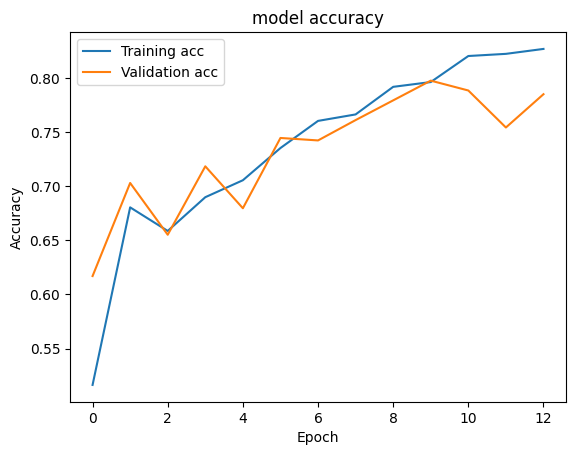

In [89]:
plt.plot(history.history['accuracy'], label='Training acc')
plt.plot(history.history['val_accuracy'],label='Validation acc')
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

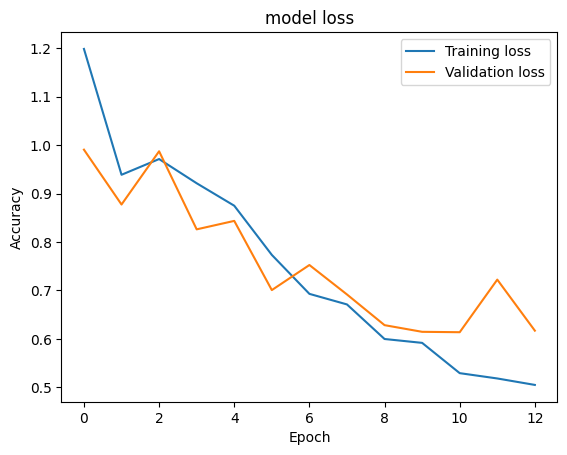

In [90]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.title('model loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [97]:
# Make predictions on the test data
lstmPredictions_prob = lstmModel.predict(X_test)
lstmPredictions = np.argmax(lstmPredictions_prob, axis=1)

55/55 [==============================] - 15s 245ms/step


In [98]:
lstm_true_labels = np.argmax(y_test, axis=1)

In [99]:
#Generate the classification report
report = classification_report(lstm_true_labels, lstmPredictions)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.81      0.87       347
           1       0.38      0.18      0.25       153
           2       0.87      0.82      0.84       402
           3       0.65      0.86      0.74       272
           4       0.98      0.95      0.96       182
           5       0.75      0.88      0.81       401

    accuracy                           0.80      1757
   macro avg       0.76      0.75      0.75      1757
weighted avg       0.79      0.80      0.79      1757



In [100]:
# Calculate the confusion matrix
lstm_conf_matrix = confusion_matrix(lstm_true_labels, lstmPredictions)

In [101]:
class_names = ['Business', 'Entertainment', 'Middle East News','Science and Technology', 'Sport', 'World']

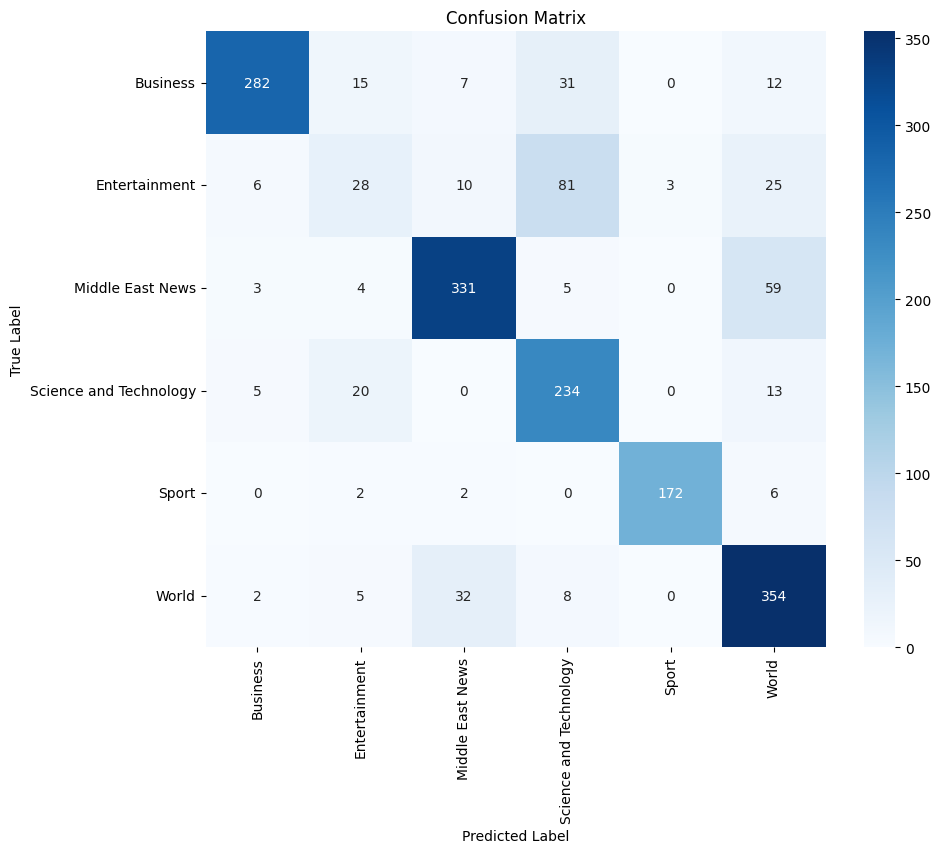

In [102]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(lstm_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Add labels and title
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

## CNN

In [103]:
cnnModel = Sequential()
cnnModel.add(Embedding(voc_size, embedding_vector_features, input_length = input_length))
cnnModel.add(Conv1D(128, 5, activation = 'relu'))
cnnModel.add(GlobalMaxPooling1D())
cnnModel.add(Dense(16, activation = 'relu'))
cnnModel.add(Dropout(0.7))
cnnModel.add(Dense(num_classes, activation = 'softmax'))

In [104]:
cnnModel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [105]:
cnnModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 3793, 1000)        1000000   
                                                                 
 conv1d (Conv1D)             (None, 3789, 128)         640128    
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense_1 (Dense)             (None, 16)                2064      
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 6)                 102       
                                                      

In [106]:
# Save best points when the model is improving
cnnModel_best_points_path = 'cnnModel_Best_points.keras'
MCP = ModelCheckpoint(cnnModel_best_points_path, verbose = 1, save_best_only = True, monitor = 'val_accuracy', mode = 'max')

# Early stop when the model stops improving
ES = EarlyStopping(monitor = 'val_accuracy', min_delta = 0, verbose = 0, restore_best_weights = True, patience = 3, mode = 'max')

# Reduce the learning rate when the model stops improving, val_loss specifically
RLP = ReduceLROnPlateau(monitor = 'val_loss', patience = 3, factor = 0.2, min_lr = 0.0001)

In [107]:
cnnHistory = cnnModel.fit(X_train, y_train,
                    epochs = 25,
                    validation_data = (X_test, y_test),
                    batch_size = 64,
                    callbacks = [MCP, ES, RLP])

Epoch 1/25
110/110 [==============================] - ETA: 0s - loss: 1.5469 - accuracy: 0.3219
Epoch 1: val_accuracy improved from -inf to 0.80080, saving model to cnnModel_Best_points.keras
110/110 [==============================] - 50s 381ms/step - loss: 1.5469 - accuracy: 0.3219 - val_loss: 1.0795 - val_accuracy: 0.8008 - lr: 0.0010
Epoch 2/25
110/110 [==============================] - ETA: 0s - loss: 1.2439 - accuracy: 0.4689
Epoch 2: val_accuracy improved from 0.80080 to 0.83267, saving model to cnnModel_Best_points.keras
110/110 [==============================] - 31s 283ms/step - loss: 1.2439 - accuracy: 0.4689 - val_loss: 0.8123 - val_accuracy: 0.8327 - lr: 0.0010
Epoch 3/25
110/110 [==============================] - ETA: 0s - loss: 1.1270 - accuracy: 0.5036
Epoch 3: val_accuracy improved from 0.83267 to 0.86340, saving model to cnnModel_Best_points.keras
110/110 [==============================] - 31s 282ms/step - loss: 1.1270 - accuracy: 0.5036 - val_loss: 0.6246 - val_accurac

In [108]:
score = cnnModel.evaluate(X_test, y_test, verbose = 2)
print("Test score:", score[0])
print('Test accuracy:', score[1])

55/55 - 3s - loss: 0.4385 - accuracy: 0.9015 - 3s/epoch - 57ms/step
Test score: 0.43851038813591003
Test accuracy: 0.9015367031097412


In [109]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

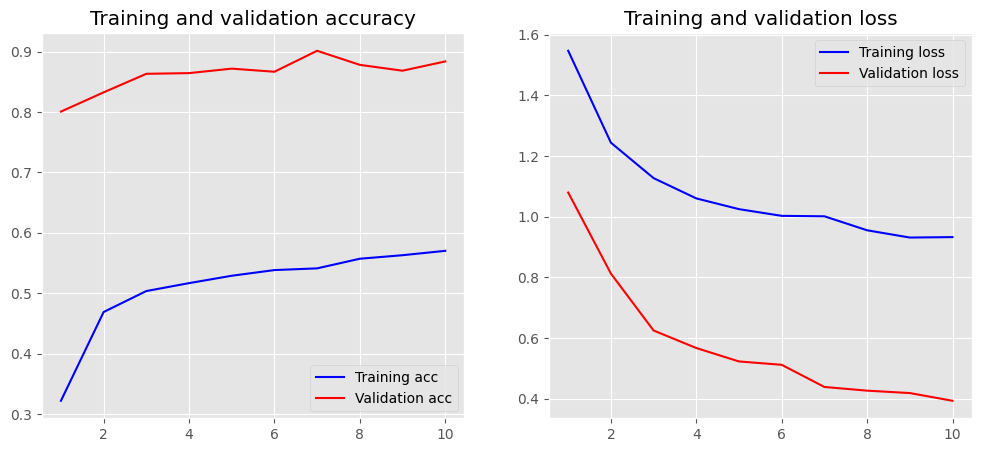

In [110]:
plot_history(cnnHistory)

In [111]:
cnnPredictions_prob = cnnModel.predict(X_test)
cnnPredictions = np.argmax(cnnPredictions_prob, axis=1)

55/55 [==============================] - 2s 40ms/step


In [112]:
cnn_true_labels = np.argmax(y_test, axis=1)

In [113]:
cnn_report = classification_report(cnn_true_labels, cnnPredictions)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.81      0.87       347
           1       0.38      0.18      0.25       153
           2       0.87      0.82      0.84       402
           3       0.65      0.86      0.74       272
           4       0.98      0.95      0.96       182
           5       0.75      0.88      0.81       401

    accuracy                           0.80      1757
   macro avg       0.76      0.75      0.75      1757
weighted avg       0.79      0.80      0.79      1757



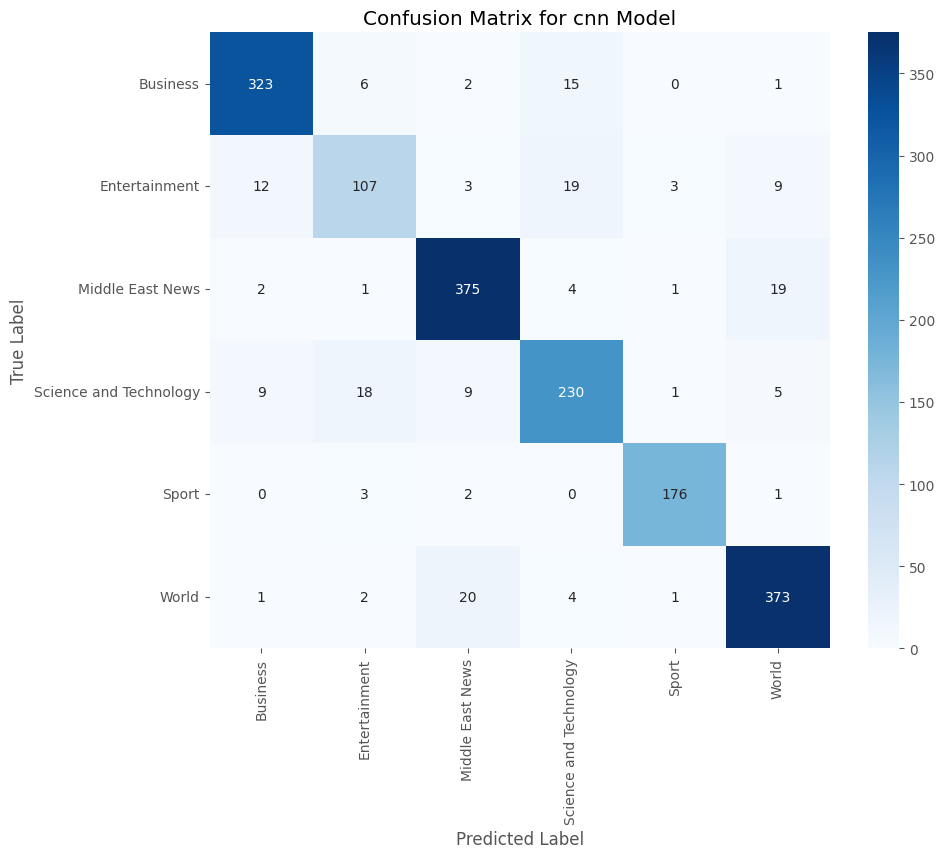

In [114]:
# confusion matrix
cnn_conf_matrix = confusion_matrix(cnn_true_labels, cnnPredictions)
class_names = ['Business', 'Entertainment', 'Middle East News','Science and Technology', 'Sport', 'World']
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cnn_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Add labels and title
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for cnn Model')

# Show the plot
plt.show()